In [2]:
%matplotlib inline

In [3]:
from numpy.random import randn

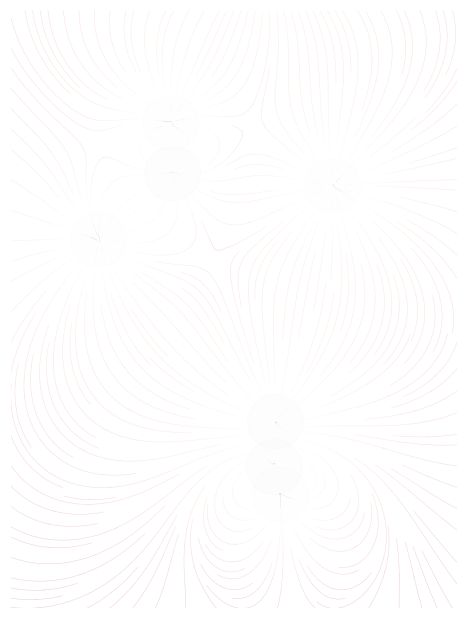

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

def E(q, r0, x, y):
    """Return the electric field vector E=(Ex,Ey) due to charge q at r0."""
    den = np.hypot(x-r0[0], y-r0[1])**3
    return q * (x - r0[0]) / den, q * (y - r0[1]) / den

# Grid of x, y points
nx, ny = 150, 150
x = np.linspace(-4, 4, nx)
y = np.linspace(-5.5, 5.5, ny)
X, Y = np.meshgrid(x, y)

# Create a multipole with nq charges of alternating sign, equally spaced
# on the unit circle.
nq = 2**3
charges = []
for i in range(nq):
    q = i%2 * 2 - 1
    charges.append((q, (randn()*2, randn()*3)))#(np.cos(2*np.pi*i/nq), np.sin(2*np.pi*i/nq))))

# Electric field vector, E=(Ex, Ey), as separate components
Ex, Ey = np.zeros((ny, nx)), np.zeros((ny, nx))
for charge in charges:
    ex, ey = E(*charge, x=X, y=Y)
    Ex += ex
    Ey += ey

fig = plt.figure(figsize=(8,11))
ax = fig.add_subplot(111)

# Plot the streamlines with an appropriate colormap and arrow style
color = 2 * np.log(np.hypot(Ex, Ey))
ax.streamplot(x, y, Ex, Ey, color=color, linewidth=0.5, cmap=light_RdGy,
              density=2, arrowstyle='-', arrowsize=1.5)

# Add filled circles for the charges themselves
charge_colors = {True: '#EEEEEE', False: '#DDDDDD'}
for q, pos in charges:
    ax.add_artist(Circle(pos, 0.5, color=charge_colors[q>0], alpha=0.05))

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_xlim(-4,4)
ax.set_ylim(-5.5,5.5)

ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)

ax.axes.spines["top"].set_color("none")
ax.axes.spines["bottom"].set_color("none")
ax.axes.spines["left"].set_color("none")
ax.axes.spines["right"].set_color("none")
fig.savefig('marca.png', transparent=True, dpi=300);

In [6]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

def cmap_map(function, cmap):
    """ Applies function (which should operate on vectors of shape 3: [r, g, b]), on colormap cmap.
    This routine will break any discontinuous points in a colormap.
    """
    cdict = cmap._segmentdata
    step_dict = {}
    # Firt get the list of points where the segments start or end
    for key in ('red', 'green', 'blue'):
        step_dict[key] = list(map(lambda x: x[0], cdict[key]))
    step_list = sum(step_dict.values(), [])
    step_list = np.array(list(set(step_list)))
    # Then compute the LUT, and apply the function to the LUT
    reduced_cmap = lambda step : np.array(cmap(step)[0:3])
    old_LUT = np.array(list(map(reduced_cmap, step_list)))
    new_LUT = np.array(list(map(function, old_LUT)))
    # Now try to make a minimal segment definition of the new LUT
    cdict = {}
    for i, key in enumerate(['red','green','blue']):
        this_cdict = {}
        for j, step in enumerate(step_list):
            if step in step_dict[key]:
                this_cdict[step] = new_LUT[j, i]
            elif new_LUT[j,i] != old_LUT[j, i]:
                this_cdict[step] = new_LUT[j, i]
        colorvector = list(map(lambda x: x + (x[1], ), this_cdict.items()))
        colorvector.sort()
        cdict[key] = colorvector

    return matplotlib.colors.LinearSegmentedColormap('colormap',cdict,1024)

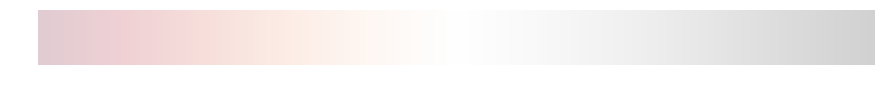

In [7]:
light_RdGy = cmap_map(lambda x: x*0.2 + 0.8, matplotlib.cm.RdGy)

x, y = np.mgrid[1:2, 1:10:0.01]
plt.figure(figsize=[15, 1])
plt.imshow(y, cmap=light_RdGy, aspect='auto')
plt.axis('off')
plt.show()